In [31]:
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [116]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from helpers.perceptron import *

In [117]:
df = pd.read_csv("./files/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [118]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [119]:
df.columns=['year','income']

In [120]:
df['year']= df['year'].astype('int')
df['income']= df['income'].astype('float')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [122]:
df.tail()

,year,income
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


(1960.0, 2026.0)

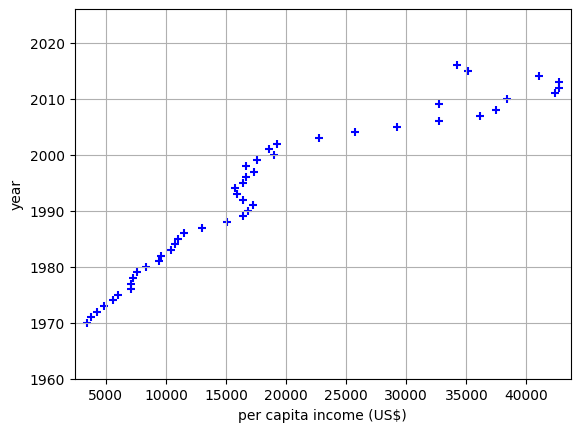

In [123]:
%matplotlib inline
plt.ylabel('year')
plt.xlabel('per capita income (US$)')

plt.scatter(df.income,df.year,color='blue',marker='+')
ax = plt.gca()
ax.grid(True)
ax.set_xlim(min(df.income)-1000, max(df.income)+1000)
ax.set_ylim(min(df.year)-10, max(df.year)+10)

In [124]:
# train_x = df.year
X = df.drop('income',axis='columns')
# train_x= df.income.values
X.head()


,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [125]:
y = df.income
y.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: income, dtype: float64

In [126]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [127]:
reg.predict([[2020]])

/home/izzumani/meine_projects/Meine_ML_Exercise/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [128]:
reg.coef_

array([828.46507522])

In [129]:
reg.intercept_

np.float64(-1632210.7578554575)

In [130]:
# Train and test split
num_training = int(0.6 * len(X))
num_training

28

In [131]:
# Training data
X_train, y_train = X[:num_training], y[:num_training]
print(f"X_train size: {X_train.shape} and y_train size: {y_train.shape}")

X_train size: (28, 1) and y_train size: (28,)


In [132]:
X_train.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [133]:
y_train.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: income, dtype: float64

In [134]:
# Test data
X_test, y_test = X[num_training:], y[num_training:]
print(f"X_test size: {X_test.shape} and y_test size: {y_test.shape}")

X_test size: (19, 1) and y_test size: (19,)


In [135]:
X_test.tail()

,year
42,2012
43,2013
44,2014
45,2015
46,2016


In [136]:
y_test.tail()

42    42665.25597
43    42676.46837
44    41039.89360
45    35175.18898
46    34229.19363
Name: income, dtype: float64

In [137]:
lr= reg.fit(X_train, y_train)

In [138]:
y_test.values

array([16622.67187, 17581.02414, 18987.38241, 18601.39724, 19232.17556,
       22739.42628, 25719.14715, 29198.05569, 32738.2629 , 36144.48122,
       37446.48609, 32755.17682, 38420.52289, 42334.71121, 42665.25597,
       42676.46837, 41039.8936 , 35175.18898, 34229.19363])

In [139]:
# Predict the output for the testing dataset using the training model:
# Predict the output
y_test_pred = reg.predict(X_test)
y_test_pred

array([19126.34275854, 19694.31831834, 20262.29387814, 20830.26943794,
       21398.24499774, 21966.22055754, 22534.19611734, 23102.17167714,
       23670.14723695, 24238.12279675, 24806.09835655, 25374.07391635,
       25942.04947615, 26510.02503595, 27078.00059575, 27645.97615555,
       28213.95171535, 28781.92727515, 29349.90283495])

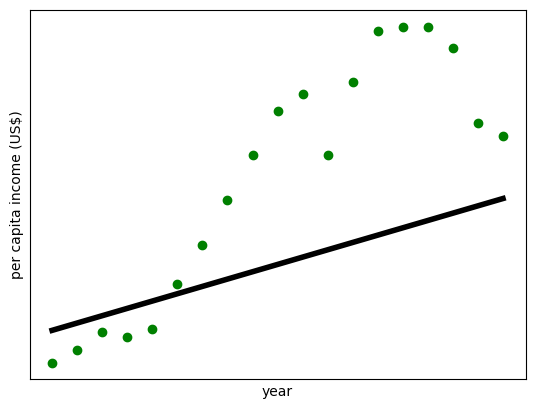

In [140]:
# Plot outputs
plt.ylabel('per capita income (US$)')
plt.xlabel('year')
# plt.ylim(-1,1)
# plt.xlim(min(df.year)-10, max(df.year)+10)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())





plt.show()

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [152]:
# Compute performance metrics
print("Linear regressor performance:")
print("Test Set Score (R^2) =", round(sm.r2_score(y_test, y_test_pred), 2))
print("Coefficient =", lr.coef_)
print("Intercept =", lr.intercept_)
# print(np.dot(X_train,lr.coef_) + lr.intercept_)

# print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
# print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
# print("Median absolute error =", round(sm.median_absolute_error(y_test,y_test_pred), 2))
# print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))

Linear regressor performance:
Test Set Score (R^2) = -0.02
Coefficient = [[567.66485107]]
Intercept = [-1115072.53495596]
[[ 3227.22165198]
 [ 3794.88650305]
 [ 4362.55135412]
 [ 4930.21620519]
 [ 5497.88105626]
 [ 6065.54590733]
 [ 6633.2107584 ]
 [ 7200.87560947]
 [ 7768.54046054]
 [ 8336.20531161]
 [ 8903.87016268]
 [ 9471.53501375]
 [10039.19986482]
 [10606.86471589]
 [11174.52956696]
 [11742.19441803]
 [12309.8592691 ]
 [12877.52412017]
 [13445.18897124]
 [14012.85382231]
 [14580.51867338]
 [15148.18352445]
 [15715.84837552]
 [16283.51322659]
 [16851.17807766]
 [17418.84292873]
 [17986.5077798 ]
 [18554.17263087]]


In [142]:
X_train = X_train.values.reshape(-1,1)
X_train

array([[1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997]])

In [143]:
y_train = y_train.values.reshape(-1,1)
y_train

array([[ 3399.299037],
       [ 3768.297935],
       [ 4251.175484],
       [ 4804.463248],
       [ 5576.514583],
       [ 5998.144346],
       [ 7062.131392],
       [ 7100.12617 ],
       [ 7247.967035],
       [ 7602.912681],
       [ 8355.96812 ],
       [ 9434.390652],
       [ 9619.438377],
       [10416.53659 ],
       [10790.32872 ],
       [11018.95585 ],
       [11482.89153 ],
       [12974.80662 ],
       [15080.28345 ],
       [16426.72548 ],
       [16838.6732  ],
       [17266.09769 ],
       [16412.08309 ],
       [15875.58673 ],
       [15755.82027 ],
       [16369.31725 ],
       [16699.82668 ],
       [17310.75775 ]])

In [144]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[28, 28, 28, 28, 28, 28, 28, 28, 28, 28]


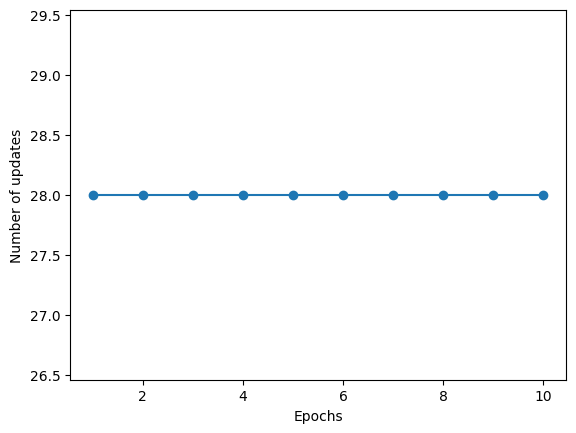

In [145]:
ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X_train, y_train)
print(ppn.errors_)
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [199]:
ridge = linear_model.Ridge(alpha=1)

lr = ridge.fit(X_train,y_train)

In [200]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([19126.34275854, 19694.31831834, 20262.29387814, 20830.26943794,
       21398.24499774, 21966.22055754, 22534.19611734, 23102.17167714,
       23670.14723695, 24238.12279675, 24806.09835655, 25374.07391635,
       25942.04947615, 26510.02503595, 27078.00059575, 27645.97615555,
       28213.95171535, 28781.92727515, 29349.90283495])

In [201]:
# Compute performance metrics
print("Linear regressor performance:")
print("Test Set Score (R^2) =", round(sm.r2_score(y_test, y_test_pred), 2))
print("Coefficient =", lr.coef_)
print("Intercept =", lr.intercept_)

Linear regressor performance:
Test Set Score (R^2) = -0.02
Coefficient = [[567.66485107]]
Intercept = [-1115072.53495596]


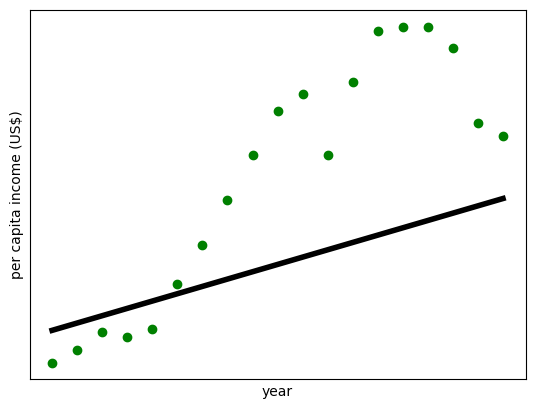

In [202]:
# Plot outputs
plt.ylabel('per capita income (US$)')
plt.xlabel('year')
# plt.ylim(-1,1)
# plt.xlim(min(df.year)-10, max(df.year)+10)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())





plt.show()